In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [3]:
df_force_ds = pd.read_csv("D:/statistical_features_force_torque_aggregation.csv")
df_tcp_ds = pd.read_csv("D:/statistical_features_tcp_aggregation.csv")
print(df_force_ds.shape)
print(df_tcp_ds.shape)

(644, 25)
(644, 29)


In [5]:
df = pd.merge(df_force_ds, df_tcp_ds, on='task_num', suffixes=('_force', '_tcp'))
print(df.shape)
df.head()

(644, 53)


,task_num,mean_Fx,std_Fx,min_Fx,max_Fx,mean_Fy,std_Fy,min_Fy,max_Fy,mean_Fz,...,min_TCP_qy,max_TCP_qy,mean_TCP_qz,std_TCP_qz,min_TCP_qz,max_TCP_qz,mean_TCP_qw,std_TCP_qw,min_TCP_qw,max_TCP_qw
0,task_0001_user_0001_scene_0001_cfg_0001,0.091330,0.441721,-2.490335,2.934646,-0.389652,1.361143,-10.273699,1.147829,-0.550880,...,-0.503776,0.112181,-0.067192,0.209961,-0.396049,0.328269,0.007042,0.714460,-0.983525,0.991930
1,task_0001_user_0001_scene_0002_cfg_0001,0.042756,0.442894,-3.010294,4.310998,-0.271278,1.317703,-12.053720,0.962178,-0.348838,...,-0.508274,0.079269,-0.065907,0.201063,-0.367868,0.343050,-0.050718,0.707992,-0.989748,0.990801
2,task_0001_user_0001_scene_0003_cfg_0001,0.061625,0.527887,-2.575394,6.217871,-0.310416,1.982168,-23.075920,0.831958,-0.410168,...,-0.497630,0.080454,-0.076289,0.193201,-0.362265,0.328109,-0.129553,0.700005,-0.992492,0.986728
3,task_0001_user_0001_scene_0004_cfg_0001,0.108036,0.599734,-2.434287,6.480320,-0.593093,1.907090,-17.846436,1.315670,-0.784609,...,-0.546746,0.006583,-0.084439,0.195288,-0.415959,0.328185,-0.166065,0.685818,-0.996269,0.921089
4,task_0001_user_0001_scene_0005_cfg_0001,0.049061,0.423931,-2.806685,3.710775,-0.260870,1.269644,-14.463535,1.009808,-0.354498,...,-0.564368,0.089154,-0.070048,0.220464,-0.403882,0.409273,-0.042176,0.706675,-0.994533,0.986224


In [7]:
df_wlabel = df.copy()
df_wlabel['task_num'] = df_wlabel['task_num'].apply(lambda x: int(x.split('_')[1]))
print(df_wlabel.shape)
df_wlabel.head()

(644, 53)


,task_num,mean_Fx,std_Fx,min_Fx,max_Fx,mean_Fy,std_Fy,min_Fy,max_Fy,mean_Fz,...,min_TCP_qy,max_TCP_qy,mean_TCP_qz,std_TCP_qz,min_TCP_qz,max_TCP_qz,mean_TCP_qw,std_TCP_qw,min_TCP_qw,max_TCP_qw
0,1,0.091330,0.441721,-2.490335,2.934646,-0.389652,1.361143,-10.273699,1.147829,-0.550880,...,-0.503776,0.112181,-0.067192,0.209961,-0.396049,0.328269,0.007042,0.714460,-0.983525,0.991930
1,1,0.042756,0.442894,-3.010294,4.310998,-0.271278,1.317703,-12.053720,0.962178,-0.348838,...,-0.508274,0.079269,-0.065907,0.201063,-0.367868,0.343050,-0.050718,0.707992,-0.989748,0.990801
2,1,0.061625,0.527887,-2.575394,6.217871,-0.310416,1.982168,-23.075920,0.831958,-0.410168,...,-0.497630,0.080454,-0.076289,0.193201,-0.362265,0.328109,-0.129553,0.700005,-0.992492,0.986728
3,1,0.108036,0.599734,-2.434287,6.480320,-0.593093,1.907090,-17.846436,1.315670,-0.784609,...,-0.546746,0.006583,-0.084439,0.195288,-0.415959,0.328185,-0.166065,0.685818,-0.996269,0.921089
4,1,0.049061,0.423931,-2.806685,3.710775,-0.260870,1.269644,-14.463535,1.009808,-0.354498,...,-0.564368,0.089154,-0.070048,0.220464,-0.403882,0.409273,-0.042176,0.706675,-0.994533,0.986224


In [9]:
selected_tasks = [
    "task_0004", "task_0006", "task_0034", "task_0037", "task_0111", "task_0088",  # Object Interaction
    "task_0048", "task_0049", "task_0100", "task_0112",                          # Tool and Rotation
    "task_0026", "task_0029", "task_0071",                                       # Containment/Access
    "task_0001", "task_0003", "task_0023"                                        # Sequential Actions
]
object_interaction = [4, 6, 111, 88, 100] #moved 100 from class 2 to class 1
tool_rotation = [48, 49]
containment_action = [26, 29, 34, 37,71]#moved 34, 37 from class1 to class3
sequential_action = [1, 3, 23]

df_wclass = df_wlabel.copy()
def task_class(x):
    if x in object_interaction:
        return 1
    elif x in tool_rotation:
        return 2
    elif x in containment_action:
        return 3
    elif x in sequential_action:
        return 4
        
df_wclass['class'] = df_wclass['task_num'].apply(lambda x: task_class(x))
df_wclass = df_wclass.drop('task_num', axis = 1)
print(df_wclass.shape)
df_wclass.head()

(644, 53)


,mean_Fx,std_Fx,min_Fx,max_Fx,mean_Fy,std_Fy,min_Fy,max_Fy,mean_Fz,std_Fz,...,max_TCP_qy,mean_TCP_qz,std_TCP_qz,min_TCP_qz,max_TCP_qz,mean_TCP_qw,std_TCP_qw,min_TCP_qw,max_TCP_qw,class
0,0.091330,0.441721,-2.490335,2.934646,-0.389652,1.361143,-10.273699,1.147829,-0.550880,1.869216,...,0.112181,-0.067192,0.209961,-0.396049,0.328269,0.007042,0.714460,-0.983525,0.991930,4
1,0.042756,0.442894,-3.010294,4.310998,-0.271278,1.317703,-12.053720,0.962178,-0.348838,1.750784,...,0.079269,-0.065907,0.201063,-0.367868,0.343050,-0.050718,0.707992,-0.989748,0.990801,4
2,0.061625,0.527887,-2.575394,6.217871,-0.310416,1.982168,-23.075920,0.831958,-0.410168,2.664554,...,0.080454,-0.076289,0.193201,-0.362265,0.328109,-0.129553,0.700005,-0.992492,0.986728,4
3,0.108036,0.599734,-2.434287,6.480320,-0.593093,1.907090,-17.846436,1.315670,-0.784609,2.470870,...,0.006583,-0.084439,0.195288,-0.415959,0.328185,-0.166065,0.685818,-0.996269,0.921089,4
4,0.049061,0.423931,-2.806685,3.710775,-0.260870,1.269644,-14.463535,1.009808,-0.354498,1.723944,...,0.089154,-0.070048,0.220464,-0.403882,0.409273,-0.042176,0.706675,-0.994533,0.986224,4


In [11]:
# shuffle and split into train and test
df_wclass_train, df_wclass_test = train_test_split(df_wclass, test_size=0.2, random_state=30, shuffle=True)

print("Train set size:", df_wclass_train.shape)
print("Test set size:", df_wclass_test.shape)


Train set size: (515, 53)
Test set size: (129, 53)


In [13]:
df_wclass_test.to_csv("test_aggregation.csv", index=False)

In [35]:
def plot_pca(features, labels, lower_percentile=1, upper_percentile=99):
    """
    Plot PCA Visualization of Task Features, excluding outliers based on percentiles.
    """
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(features)
    
    pc1_low, pc1_high = np.percentile(reduced_data[:, 0], [lower_percentile, upper_percentile])
    pc2_low, pc2_high = np.percentile(reduced_data[:, 1], [lower_percentile, upper_percentile])
    
    mask = (reduced_data[:, 0] >= pc1_low) & (reduced_data[:, 0] <= pc1_high) & \
           (reduced_data[:, 1] >= pc2_low) & (reduced_data[:, 1] <= pc2_high)
    filtered_data = reduced_data[mask]
    filtered_labels = labels[mask]
    
    plt.figure(figsize=(10, 6))
    for label in np.unique(filtered_labels):
        indices = filtered_labels == label
        plt.scatter(filtered_data[indices, 0], filtered_data[indices, 1], label=f"Task {label}", alpha=0.6)
    
    plt.title("PCA Visualization of Task Features (Filtered)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_tsne(features, labels):
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced_data = tsne.fit_transform(features)
    plt.figure(figsize=(10, 6))
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(reduced_data[indices, 0], reduced_data[indices, 1], label=f"Class {label}", alpha=0.6)
    #plt.title("t-SNE Visualization of Task Features")
    #plt.xlabel("t-SNE Component 1")
    #plt.ylabel("t-SNE Component 2")
    plt.legend()
    plt.grid(True)
    plt.savefig("tsne_augmented.png", dpi=300, bbox_inches='tight')
    plt.show()
    #plt.savefig("tsne_raw.png", dpi=300, bbox_inches='tight')

Generating PCA Visualization...


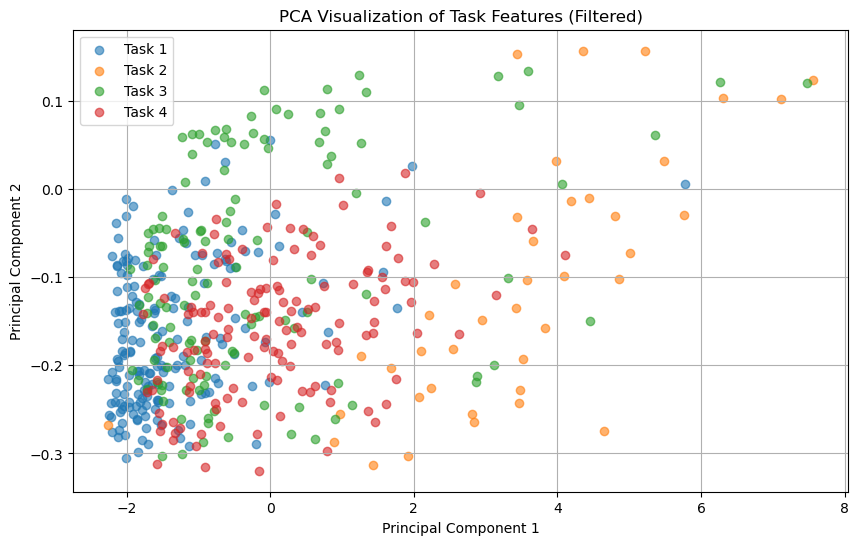

Generating t-SNE Visualization...


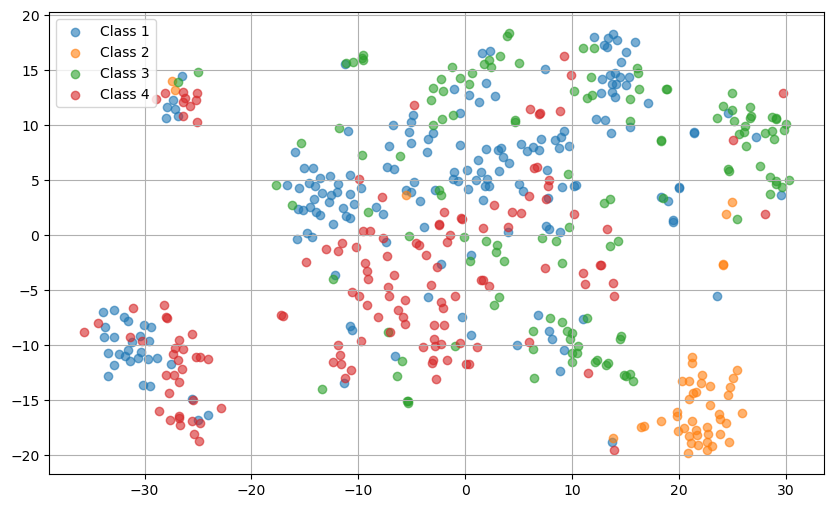

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

df_class = df_wclass.copy()
df_task_num = df_wlabel.copy()

df = df_wclass_train.copy()
labels = df['class'] 
features = df.drop(columns=['class'])  

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("PCA Visualization")
plot_pca(features_scaled, labels)
print("t-SNE Visualization")
plot_tsne(features_scaled, labels)


In [47]:
def preprocess_data():
    """
    Load data, standardize features, and one-hot encode labels.
    """

    data = df_wclass_train.copy()

    X = data.drop(columns=["class"])
    y = data["class"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    label_encoder = OneHotEncoder(sparse_output=False)
    y_encoded = label_encoder.fit_transform(y.values.reshape(-1, 1))

    X_train, X_val, y_train, y_val = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42)

    return (
        torch.tensor(X_train, dtype=torch.float32),
        torch.tensor(X_val, dtype=torch.float32),
        torch.tensor(y_train, dtype=torch.float32),
        torch.tensor(y_val, dtype=torch.float32),
        label_encoder,
        scaler,
    )

class ConditionalVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, label_dim):
        super(ConditionalVAE, self).__init__()
        self.latent_dim = latent_dim

        self.encoder = nn.Sequential(
            nn.Linear(input_dim + label_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
        )
        self.mu_layer = nn.Linear(64, latent_dim)
        self.logvar_layer = nn.Linear(64, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + label_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
        )

    def encode(self, x, labels):
        inputs = torch.cat([x, labels], dim=1)
        hidden = self.encoder(inputs)
        mu = self.mu_layer(hidden)
        logvar = self.logvar_layer(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, labels):
        inputs = torch.cat([z, labels], dim=1)
        return self.decoder(inputs)

    def forward(self, x, labels):
        mu, logvar = self.encode(x, labels)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z, labels)
        return recon_x, mu, logvar

def vae_loss(recon_x, x, mu, logvar):
    """
    VAE loss = Reconstruction Loss + KL Divergence
    """
    recon_loss = nn.MSELoss(reduction="sum")(recon_x, x)
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_div

def train_vae(model, train_data, train_labels, val_data, val_labels, epochs=50, batch_size=64):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(train_data, train_labels), batch_size=batch_size, shuffle=True
    )
    val_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(val_data, val_labels), batch_size=batch_size
    )

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_x, batch_labels in train_loader:
            optimizer.zero_grad()
            recon_x, mu, logvar = model(batch_x, batch_labels)
            loss = vae_loss(recon_x, batch_x, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_x, batch_labels in val_loader:
                recon_x, mu, logvar = model(batch_x, batch_labels)
                val_loss += vae_loss(recon_x, batch_x, mu, logvar).item()

        print(
            f"Epoch [{epoch + 1}/{epochs}], Train Loss: {total_loss:.2f}, Val Loss: {val_loss:.2f}"
        )

# ----------------------------- Data Generation -----------------------------
def generate_data(vae_model, label_encoder, num_samples_per_class, latent_dim, scaler):
    """
    Generate synthetic data conditioned on class labels.
    """
    vae_model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vae_model.to(device)

    generated_data = []
    all_labels = []

    class_labels = label_encoder.categories_[0]
    for class_label in class_labels:
        label_onehot = label_encoder.transform([[class_label]])[0]
        label_tensor = torch.tensor(label_onehot, dtype=torch.float32).to(device)
        label_tensor = label_tensor.repeat(num_samples_per_class, 1)

        z = torch.randn(num_samples_per_class, latent_dim).to(device)

        with torch.no_grad():
            generated_features = vae_model.decode(z, label_tensor)

        generated_features_np = scaler.inverse_transform(generated_features.cpu().numpy())
        generated_labels_np = [class_label] * num_samples_per_class

        generated_data.append(generated_features_np)
        all_labels.extend(generated_labels_np)

    df_generated = pd.DataFrame(np.vstack(generated_data), columns=[f"feature_{i}" for i in range(generated_features_np.shape[1])])
    df_generated["class"] = all_labels
    return df_generated

# ----------------------------- Main Pipeline -----------------------------
X_train, X_val, y_train, y_val, label_encoder, scaler = preprocess_data()
input_dim = X_train.shape[1]
latent_dim = 10
label_dim = y_train.shape[1]

vae = ConditionalVAE(input_dim, latent_dim, label_dim)
train_vae(vae, X_train, y_train, X_val, y_val, epochs=50, batch_size=32)

num_samples_per_class = 200
generated_df = generate_data(vae, label_encoder, num_samples_per_class, latent_dim, scaler)

#generated_df.to_csv("generated_data.csv", index=False)
print("Generated data saved to 'generated_data.csv'.")


Epoch [1/50], Train Loss: 20205.41, Val Loss: 6785.73
Epoch [2/50], Train Loss: 19819.50, Val Loss: 6771.26
Epoch [3/50], Train Loss: 19093.60, Val Loss: 6680.37
Epoch [4/50], Train Loss: 17014.12, Val Loss: 6601.64
Epoch [5/50], Train Loss: 14704.09, Val Loss: 6537.90
Epoch [6/50], Train Loss: 13453.62, Val Loss: 6520.47
Epoch [7/50], Train Loss: 12459.08, Val Loss: 6536.52
Epoch [8/50], Train Loss: 11944.20, Val Loss: 6546.69
Epoch [9/50], Train Loss: 11918.84, Val Loss: 6516.70
Epoch [10/50], Train Loss: 11762.24, Val Loss: 6559.46
Epoch [11/50], Train Loss: 11147.88, Val Loss: 6441.41
Epoch [12/50], Train Loss: 10914.64, Val Loss: 6410.64
Epoch [13/50], Train Loss: 10407.28, Val Loss: 6400.98
Epoch [14/50], Train Loss: 10460.21, Val Loss: 6404.47
Epoch [15/50], Train Loss: 10646.27, Val Loss: 6439.71
Epoch [16/50], Train Loss: 9977.11, Val Loss: 6362.82
Epoch [17/50], Train Loss: 9862.77, Val Loss: 6403.08
Epoch [18/50], Train Loss: 9508.98, Val Loss: 6425.83
Epoch [19/50], Train L

In [59]:
generated_df.shape

(4000, 53)

In [49]:
generated_df.columns = df_wclass_train.columns
combined_df_wclass = pd.concat([df_wclass_train, generated_df], ignore_index=True)
print(combined_df_wclass.shape)

(1315, 53)


Generating PCA Visualization...


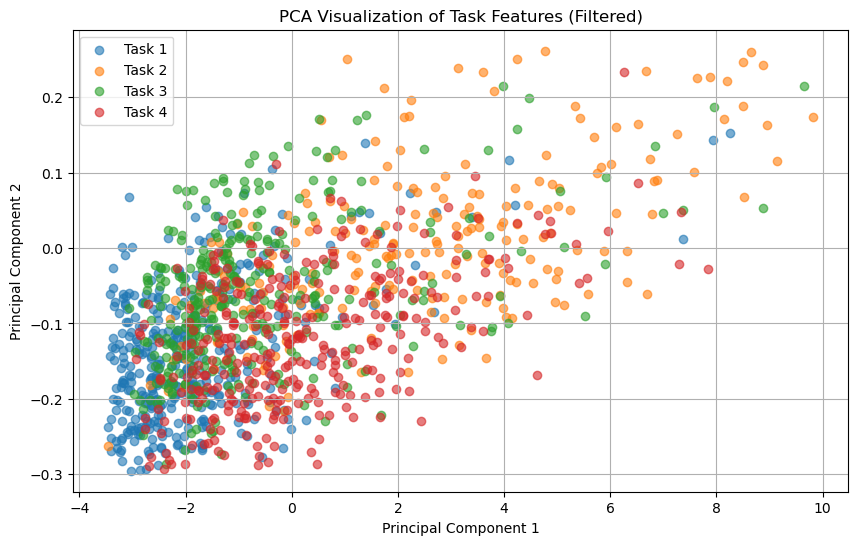

Generating t-SNE Visualization...


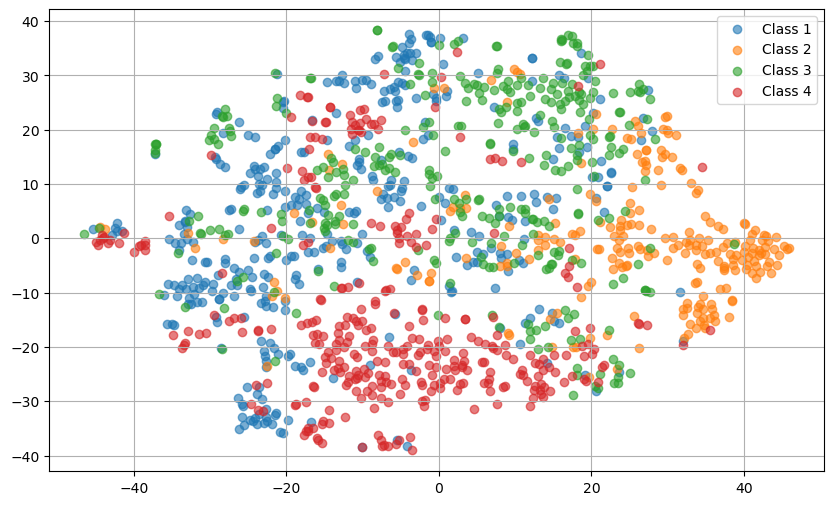

In [51]:
df = combined_df_wclass.copy()
labels = df['class']  # Task labels
features = df.drop(columns=['class'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("PCA Visualization")
plot_pca(features_scaled, labels)

print("t-SNE Visualization")
plot_tsne(features_scaled, labels)

In [53]:
def augment_with_gaussian_noise_unconditioned(df, label_column, num_augmentations=2, noise_level=0.05):
    """
    Performs Gaussian noise augmentation on the dataset without class conditions.
    """
    labels = df[label_column]
    features = df.drop(columns=[label_column])
    
    feature_means = features.mean(axis=0)
    feature_stds = features.std(axis=0)
    
    augmented_data = [] 

    for _ in range(num_augmentations):
        noise = np.random.normal(0, noise_level * feature_stds, size=features.shape)
        augmented_features = features + noise
        augmented_df = pd.DataFrame(augmented_features, columns=features.columns)
        augmented_df[label_column] = labels.values  # Ensure labels remain the same
        
        augmented_data.append(augmented_df)
    
    augmented_df = pd.concat(augmented_data, ignore_index=True)
    
    combined_df = pd.concat([df, augmented_df], ignore_index=True)
    
    print(f"Original dataset size: {df.shape[0]}")
    print(f"Augmented dataset size: {augmented_df.shape[0]}")
    print(f"Combined dataset size: {combined_df.shape[0]}")
    
    return combined_df

original_df = combined_df_wclass.copy()
combined_df_gaussian_unconditioned = augment_with_gaussian_noise_unconditioned(
    df=original_df, 
    label_column="class", 
    num_augmentations=1,  
    noise_level=0.1   
)
    
#combined_df.to_csv("augmented_dataset.csv", index=False)
print(combined_df_gaussian_unconditioned.shape)
combined_df_gaussian_unconditioned.head()


Original dataset size: 1315
Augmented dataset size: 1315
Combined dataset size: 2630
(2630, 53)


,mean_Fx,std_Fx,min_Fx,max_Fx,mean_Fy,std_Fy,min_Fy,max_Fy,mean_Fz,std_Fz,...,max_TCP_qy,mean_TCP_qz,std_TCP_qz,min_TCP_qz,max_TCP_qz,mean_TCP_qw,std_TCP_qw,min_TCP_qw,max_TCP_qw,class
0,-0.024714,0.398446,-1.803881,1.894333,-0.450330,1.046060,-7.003335,0.756397,-0.517852,1.053331,...,0.170226,-0.074916,0.252944,-0.546832,0.348799,-0.104876,0.709640,-0.981010,0.979313,4
1,-0.006140,0.775392,-3.253579,5.793850,-0.696707,1.752299,-11.823605,1.268974,-0.604465,2.075556,...,0.174449,-0.041131,0.217554,-0.329701,0.394893,-0.142525,0.692421,-0.980712,0.984883,4
2,0.015300,0.382574,-1.238802,1.441239,-0.020705,0.293863,-1.142005,1.151956,0.025054,0.249368,...,0.032133,-0.046037,0.202159,-0.469990,0.330257,0.003588,0.708966,-0.993103,0.998701,3
3,-0.013003,0.305046,-1.531037,1.383370,-0.017993,0.326706,-3.512474,1.072790,-0.008449,0.361604,...,0.008705,-0.057691,0.258708,-0.567725,0.342835,-0.003030,0.730158,-0.978676,0.978718,1
4,0.019167,0.397897,-2.063389,2.038524,-0.261686,1.241773,-15.319391,1.496653,-0.241657,1.267985,...,0.048715,-0.069650,0.257006,-0.502738,0.371942,-0.119831,0.682011,-0.980531,0.987901,1


Generating PCA Visualization...


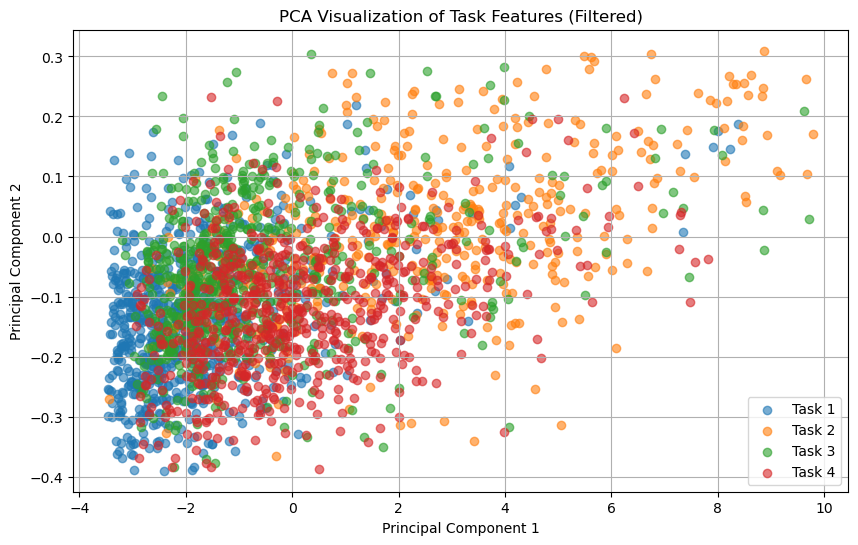

Generating t-SNE Visualization...


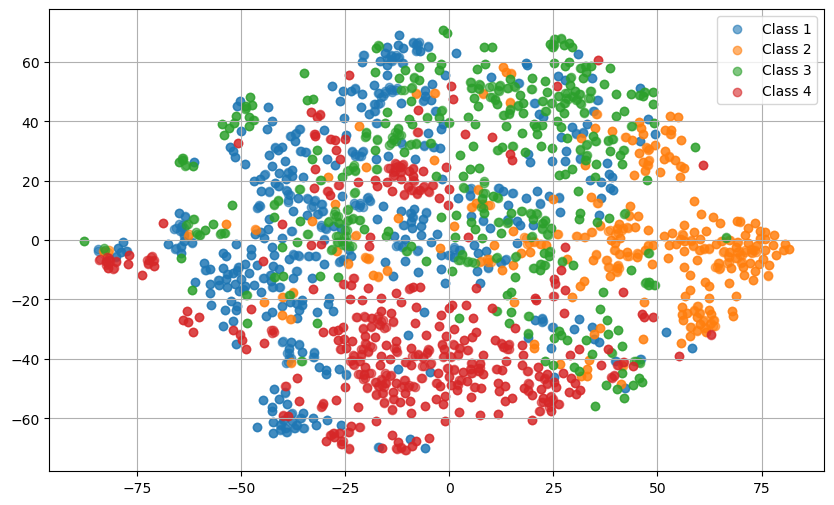

In [55]:
df = combined_df_gaussian_unconditioned.copy()
labels = df['class']
features = df.drop(columns=['class'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("PCA Visualization")
plot_pca(features_scaled, labels)

print("t-SNE Visualization")
plot_tsne(features_scaled, labels)

In [69]:
combined_df_gaussian_unconditioned.to_csv("VAE_UnconGaussian_train_aggregation.csv", index=False)